### 해시태그 리트윗 네트워크

In [4]:
import jsonlines
import json

In [5]:
def load_jsonl(path):
    data = []
    with open(path, 'r', encoding= 'utf-8') as reader:
        for line in reader:
            data.append(json.loads(line))
    return data

In [19]:
data = load_jsonl('data/repealthe19th.jsonl')
len(data)

23343

In [18]:
retweets = []

for tweet in data :
    if 'retweeted_status' in tweet :
        retweets.append(tweet)
len(retweets)

14858

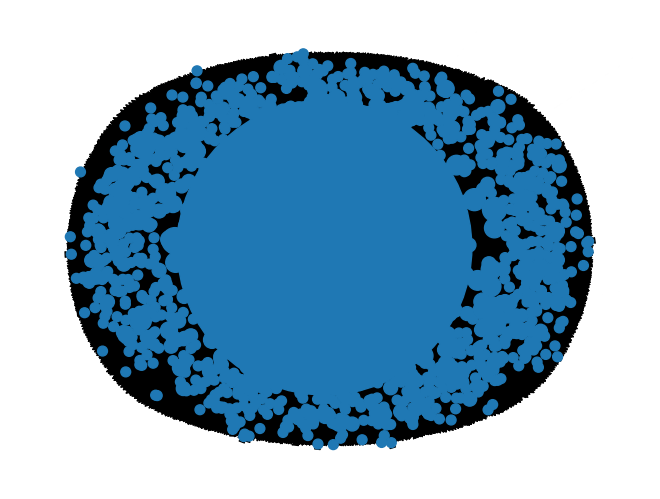

In [63]:
import networkx as nx

h = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']

    if h.has_edge(retweeted_sn, retweeter_sn):
        h.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else :
        h.add_edge(retweeted_sn, retweeter_sn, weight = 1)

node_sizes = [h.out_degree(n) * 50 for n in h.nodes()]

edges = h.edges()
weights = [h[u][v]['weight'] for u,v in edges]

self = list(nx.selfloop_edges(h))
h.remove_edges_from(self)

nx.draw(h, node_size = node_sizes, width = weights)

노드 개수

In [23]:
h.number_of_nodes()

14874

링크 개수

In [24]:
h.number_of_edges()

14795

나가는 연결강도(가장 많이 리트윗된 사용자)

In [28]:
from operator import itemgetter

sorted(h.out_degree(weight = 'weight'), key= itemgetter(1), reverse= True)[:2]

[('Samandjunk', 901), ('m_kaish_esq', 394)]

들어오는 연결강도(가장 많이 리트윗한 사용자)

In [29]:
sorted(h.in_degree(weight = 'weight'), key = itemgetter(1), reverse=True)[:1]

[('JenTromans', 48)]

가장 많이 리트윗된 트윗의 ID

In [37]:
sorted(h.out_degree(), key = itemgetter(1), reverse= True)[:1]

[('Samandjunk', 900)]

나가는 연결강도가 0인 노드 개수

In [54]:
def zero(x):
    val = list(dict(x).values())
    return val.count(0)

In [55]:
zero(h.out_degree())

12928

연결상태

In [60]:
nx.is_strongly_connected(h)

False

In [62]:
nx.is_weakly_connected(h)

False

약하게 연결된 가장 큰 덩어리

In [65]:
comps = sorted(nx.weakly_connected_components(h), key = len, reverse= True)
big_comp = comps[0]
hwc = nx.subgraph(h, big_comp)
hwc.number_of_nodes()

11909

In [66]:
nx.average_clustering(h)

0.00030038895981708205

방향성 네트워크에서 연결선 수와 연결강도 사이의 관계

In [67]:
def val(x):
    val = list(dict(x).values())
    return val

In [68]:
import scipy.stats as stats

stats.pearsonr(val(h.in_degree()), val(h.in_degree(weight = 'weight')))

(0.9968333833023361, 0.0)

In [69]:
stats.pearsonr(val(h.out_degree()), val(h.out_degree(weight = 'weight')))

(0.9999672527231495, 0.0)

In [77]:
sorted(h.in_degree(), key = itemgetter(1), reverse=True)[:5]

[('JenTromans', 48),
 ('ketagoesglobal', 12),
 ('tmmckinney777', 11),
 ('JENw1n525', 11),
 ('HerMillennials', 10)]

In [76]:
sorted(h.in_degree(weight= 'weight'), key = itemgetter(1), reverse=True)[:5]

[('JenTromans', 48),
 ('ketagoesglobal', 12),
 ('tmmckinney777', 11),
 ('JENw1n525', 11),
 ('HerMillennials', 10)]

In [78]:
sorted(h.out_degree(), key = itemgetter(1), reverse=True)[:5]

[('Samandjunk', 900),
 ('m_kaish_esq', 394),
 ('JoyAnnReid', 365),
 ('GeorgeTakei', 360),
 ('charley_ck14', 299)]

In [79]:
sorted(h.out_degree(weight='weight'), key = itemgetter(1), reverse=True)[:5]

[('Samandjunk', 901),
 ('m_kaish_esq', 394),
 ('JoyAnnReid', 366),
 ('GeorgeTakei', 360),
 ('charley_ck14', 299)]